# **UAS PSD**




In [178]:
import yfinance as yf
import pandas as pd
# Ambil data AMD dari Finance Yahoo
data = yf.download('AMD', start='2023-01-01', end='2023-06-15')
# Simpan data
data.to_csv('data_amd.csv', index=False)
# Menampilkan data
print(data)


[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-01-03   66.000000   66.879997   63.590000   64.019997   64.019997   
2023-01-04   65.000000   65.790001   63.310001   64.660004   64.660004   
2023-01-05   64.150002   64.349998   62.299999   62.330002   62.330002   
2023-01-06   63.150002   64.300003   60.049999   63.959999   63.959999   
2023-01-09   66.220001   69.320000   65.669998   67.239998   67.239998   
...                ...         ...         ...         ...         ...   
2023-06-08  118.300003  122.209999  117.050003  121.050003  121.050003   
2023-06-09  123.570000  127.250000  123.550003  124.919998  124.919998   
2023-06-12  128.520004  130.479996  126.400002  129.190002  129.190002   
2023-06-13  132.320007  132.830002  122.449997  124.529999  124.529999   
2023-06-14  126.529999  127.730003  123.809

<Axes: xlabel='Date'>

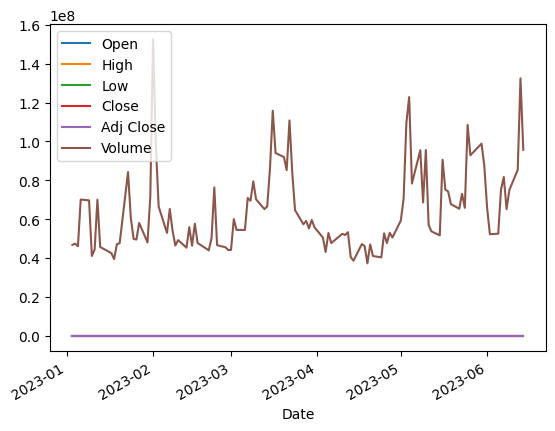

In [179]:
import matplotlib.pyplot as plt
data.plot()

In [180]:
data.shape

(113, 6)

In [181]:
data_open=data['Open']

In [182]:
# transform univariate time series to supervised learning problem
from numpy import array
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
    # find the end of this pattern
        end_ix = i + n_steps
    # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
    # gather input and output parts of the pattern
        # print(i, end_ix)
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [183]:
n_steps = 5
X, y = split_sequence(data_open, n_steps)

In [184]:
# column names to X and y data frames
df_X = pd.DataFrame(X, columns=['t-'+str(i) for i in range(n_steps-1, -1,-1)])
df_y = pd.DataFrame(y, columns=['t+1 (prediction)'])

# concat df_X and df_y
df = pd.concat([df_X, df_y], axis=1)

In [185]:
# df_X.head()
# df_y.head()
df.head(3)

,t-4,t-3,t-2,t-1,t-0,t+1 (prediction)
0,66.000000,65.000000,64.150002,63.150002,66.220001,66.669998
1,65.000000,64.150002,63.150002,66.220001,66.669998,68.389999
2,64.150002,63.150002,66.220001,66.669998,68.389999,70.070000


In [186]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
X_norm= scaler.fit_transform(df_X)
# y_norm= scaler.fit_transform(df_y)


In [187]:
X_norm

array([[0.04236656, 0.02750109, 0.01486547, 0.        , 0.        ],
       [0.02750109, 0.01486547, 0.        , 0.04563698, 0.00680782],
       [0.01486547, 0.        , 0.04563698, 0.0523264 , 0.03282902],
       [0.        , 0.04563698, 0.0523264 , 0.07789502, 0.05824505],
       [0.04563698, 0.0523264 , 0.07789502, 0.10286901, 0.05476543],
       [0.0523264 , 0.07789502, 0.10286901, 0.09944991, 0.07034797],
       [0.07789502, 0.10286901, 0.09944991, 0.11476143, 0.08547657],
       [0.10286901, 0.09944991, 0.11476143, 0.1296269 , 0.04160363],
       [0.09944991, 0.11476143, 0.1296269 , 0.08651702, 0.02708019],
       [0.11476143, 0.1296269 , 0.08651702, 0.07224618, 0.09077155],
       [0.1296269 , 0.08651702, 0.07224618, 0.13482979, 0.11391828],
       [0.08651702, 0.07224618, 0.13482979, 0.15757394, 0.101059  ],
       [0.07224618, 0.13482979, 0.15757394, 0.14493832, 0.1555219 ],
       [0.13482979, 0.15757394, 0.14493832, 0.19845398, 0.1131618 ],
       [0.15757394, 0.14493832, 0.

In [188]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=0)


In [189]:
# import knn
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor

model_knn = KNeighborsRegressor(n_neighbors=5)

In [190]:
model_knn.fit(X_train, y_train)
y_pred=model_knn.predict(X_test)

In [191]:
print('R-Squared:', model_knn.score(X_test, y_pred))

R-Squared: 1.0


In [192]:
from sklearn.metrics import mean_absolute_percentage_error

# Mengubah dimensi y_pred menjadi satu dimensi
y_pred = y_pred.flatten()

# Mengambil jumlah sampel yang sesuai
n_samples = min(len(y_test), len(y_pred))
y_test = y_test[:n_samples]
y_pred = y_pred[:n_samples]

# Menghitung MAPE
mape = mean_absolute_percentage_error(y_test, y_pred)
print('MAPE:', mape)

MAPE: 0.030004537576070852


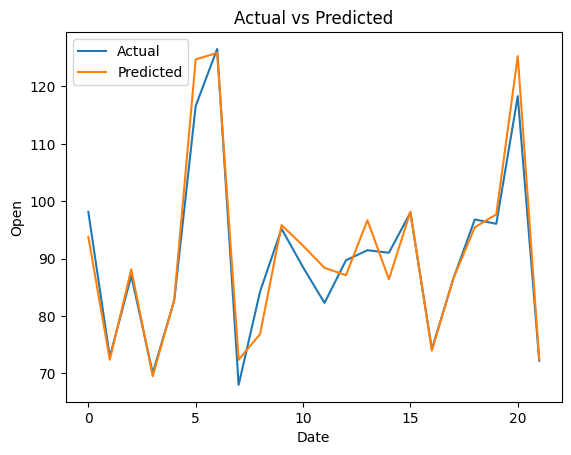

In [193]:
# Membuat grafik MAPE
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Open')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

#Naive Bayes

In [194]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_absolute_error

model_nb = GaussianNB()
model_nb.fit(X_train, y_train)
y_pred_nb = model_nb.predict(X_test)

mae_nb = mean_absolute_error(y_test, y_pred)
print('MAE (Naive Bayes):', mae_nb)

ValueError: ignored

#Decision Tree (Pohon Keputusan)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_percentage_error

# Inisialisasi dan latih model Decision Tree
model_dt = DecisionTreeRegressor()
model_dt.fit(X_train, y_train)

# Prediksi pada data test
y_pred = model_dt.predict(X_test)

# Menghitung MAPE
mape = mean_absolute_percentage_error(y_test, y_pred)
print('MAPE:', mape)

#Multilayer Percptron (MLP)

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_percentage_error

# Inisialisasi dan latih model MLP
model_mlp = MLPRegressor()
model_mlp.fit(X_train, y_train)

# Prediksi pada data test
y_pred = model_mlp.predict(X_test)

# Menghitung MAPE
mape = mean_absolute_percentage_error(y_test, y_pred)
print('MAPE:', mape)